In [1]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os  
import glob
%matplotlib inline

In [2]:
images = os.listdir("../camera_cal/")
print(images)

['calibration1.jpg', 'calibration10.jpg', 'calibration11.jpg', 'calibration12.jpg', 'calibration13.jpg', 'calibration14.jpg', 'calibration15.jpg', 'calibration16.jpg', 'calibration17.jpg', 'calibration18.jpg', 'calibration19.jpg', 'calibration2.jpg', 'calibration20.jpg', 'calibration3.jpg', 'calibration4.jpg', 'calibration5.jpg', 'calibration6.jpg', 'calibration7.jpg', 'calibration8.jpg', 'calibration9.jpg']


In [3]:
images = glob.glob('../camera_cal/calibration*.jpg')
print(images)

['../camera_cal\\calibration1.jpg', '../camera_cal\\calibration10.jpg', '../camera_cal\\calibration11.jpg', '../camera_cal\\calibration12.jpg', '../camera_cal\\calibration13.jpg', '../camera_cal\\calibration14.jpg', '../camera_cal\\calibration15.jpg', '../camera_cal\\calibration16.jpg', '../camera_cal\\calibration17.jpg', '../camera_cal\\calibration18.jpg', '../camera_cal\\calibration19.jpg', '../camera_cal\\calibration2.jpg', '../camera_cal\\calibration20.jpg', '../camera_cal\\calibration3.jpg', '../camera_cal\\calibration4.jpg', '../camera_cal\\calibration5.jpg', '../camera_cal\\calibration6.jpg', '../camera_cal\\calibration7.jpg', '../camera_cal\\calibration8.jpg', '../camera_cal\\calibration9.jpg']


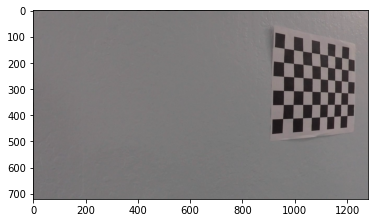

In [42]:
img = cv2.imread(images[5])
img_size = (img.shape[1], img.shape[0])
plt.imshow(img)

In [43]:
# prepare object points
nx = 9 # number of inside corners in x
ny = 6 # number of inside corners in y

In [44]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [45]:
# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)

In [46]:
# If found, draw corners
if ret == True:
    cv2.drawChessboardCorners(img, (nx,ny), corners, ret)

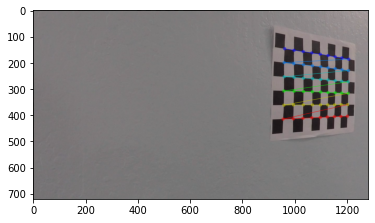

In [47]:
plt.imshow(img)

In [33]:
# Arrays to store object points and image points from all the images
objpoints = [] # 3D points from real chessboard, will be the same for all the images since chessboard does not change
imgpoints = [] # 2D points on the image plane

In [34]:
# Preparing the object points
objp = np.zeros((nx*ny,3), np.float32)

In [35]:
np.mgrid[0:nx,0:ny]

array([[[0, 0, 0, 0, 0, 0],
        [1, 1, 1, 1, 1, 1],
        [2, 2, 2, 2, 2, 2],
        [3, 3, 3, 3, 3, 3],
        [4, 4, 4, 4, 4, 4],
        [5, 5, 5, 5, 5, 5],
        [6, 6, 6, 6, 6, 6],
        [7, 7, 7, 7, 7, 7],
        [8, 8, 8, 8, 8, 8]],

       [[0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5],
        [0, 1, 2, 3, 4, 5]]])

In [36]:
objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)

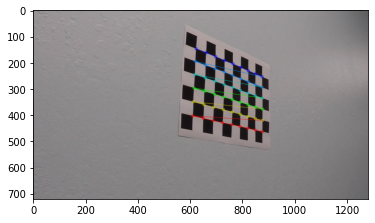

In [37]:
for imgname in images:
    img = cv2.imread(imgname)
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx,ny), None)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        # draw corners
        cv2.drawChessboardCorners(img, (nx,ny), corners, ret)
        plt.imshow(img)

In [38]:
ret, mtx, dist, _, _ = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)

In [39]:
print(mtx, dist)

[[1.15777930e+03 0.00000000e+00 6.67111054e+02]
 [0.00000000e+00 1.15282291e+03 3.86128938e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] [[-0.24688775 -0.02373133 -0.00109842  0.00035108 -0.00258571]]


In [40]:
def undistort(img):
    undist_img = cv2.undistort(img, mtx, dist, None, mtx)
    
    return undist_img

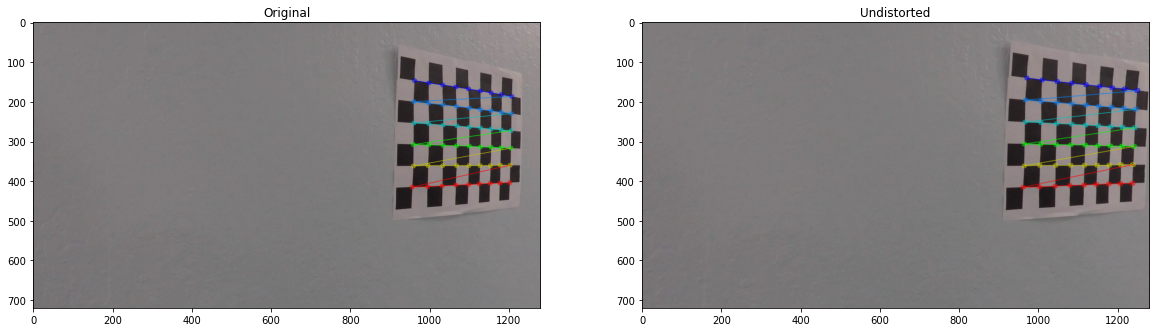

In [48]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(20,10))
ax1.set_title("Original")
ax1.imshow(img)
ax2.set_title("Undistorted")
ax2.imshow(undistort(img))

In [18]:
cal_info = {}
cal_info["mtx"] = mtx
cal_info["dist"] = dist

In [19]:
cal_info

{'mtx': array([[1.15777930e+03, 0.00000000e+00, 6.67111054e+02],
        [0.00000000e+00, 1.15282291e+03, 3.86128938e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 'dist': array([[-0.24688775, -0.02373133, -0.00109842,  0.00035108, -0.00258571]])}

In [20]:
import pickle
a_file = open("cal_info.pkl", "wb")
pickle.dump(cal_info, a_file)
a_file.close()